# Rank Adjustment Estimator

The **Rank Adjustment estimator** is a non-parametric method used to estimate the **reliability function** $ R(t) $ — the probability that a machine or system remains operational beyond time $ t $ — from time-to-failure data, including right-censored observations. It is applied in **machine reliability**, **maintenance engineering**, and **asset management** as an alternative to distribution-free estimation without assuming a specific failure distribution.

---

## Key Notation

- $ t_1 \leq t_2 \leq \dots \leq t_n $: Ordered failure (or censoring) times.
- $ r_i $: **Rank** of the $ i $-th ordered time, where $ r_i = i - 0.3 $ for failed units (or $ i - 0.5 $ for censored units in some variants).
- $ R(t) $: **Reliability** at time $ t $ (probability of no failure up to $ t $).

---

## Rank Adjustment Formula

The estimator of the reliability function is:

$$
\hat{R}(t) = 1 - \frac{1}{n+1} \sum_{t_i \leq t} r_i
$$

Where:
- The sum is over all ordered times $ t_i \leq t $ (including censored times).
- $ r_i $ adjusts the simple rank $ i $ to account for censoring and reduce bias.
- A common adjustment is $ r_i = i - 0.3 $ for failures and $ r_i = i - 0.5 $ for censored observations, though variants like $ r_i = i - 0.5 $ (mid-rank) exist.

This approach treats the data as ranks and estimates the cumulative distribution, then derives reliability as $ \hat{R}(t) = 1 - \hat{F}(t) $.

---

## Step-by-Step Interpretation

1. Order all observed times (failures and censoring times) in ascending order.
2. Assign adjusted ranks $ r_i $ to each ordered time.
3. For a given $ t $, sum the ranks of all times up to $ t $.
4. Compute the estimated CDF as $ \hat{F}(t) = \frac{1}{n+1} \sum r_i $ for $ t_i \leq t $.
5. The reliability is $ \hat{R}(t) = 1 - \hat{F}(t) $ (step function, decreasing at failure times).

---

## Example (Conceptual) — Machine Fleet

Assume 5 units with ordered times: 500 (fail), 800 (censor), 1200 (fail), 1500 (fail), 2000 (censor).  
Adjusted ranks ($ r_i = i - 0.3 $ for fails, $ i - 0.5 $ for censors):

| Ordered Time (hours) | Status   | $ i $ | $ r_i $    |
|----------------------|----------|-------|------------|
| 500                  | Fail     | 1     | $ 1 - 0.3 = 0.7 $  |
| 800                  | Censor   | 2     | $ 2 - 0.5 = 1.5 $  |
| 1200                 | Fail     | 3     | $ 3 - 0.3 = 2.7 $  |
| 1500                 | Fail     | 4     | $ 4 - 0.3 = 3.7 $  |
| 2000                 | Censor   | 5     | $ 5 - 0.5 = 4.5 $  |

At $ t = 1200 $ (sum ranks up to 1200: 0.7 + 1.5 + 2.7 = 4.9):  
$ \hat{F}(1200) = \frac{4.9}{5+1} \approx 0.817 $  
$ \hat{R}(1200) \approx 1 - 0.817 = 0.183 $ (18.3% reliability)

---

## Properties

- **Non-parametric**: No distributional assumptions; based purely on ranks.
- **Handles censoring**: Adjusted ranks account for incomplete observations.
- **Step function**: Decreases at failure times; similar to Kaplan-Meier but often yields slightly higher reliability estimates.
- **Simple computation**: Useful for small samples or when avoiding complex products/sums.
- **Confidence intervals**: Can use Greenwood's formula (as in KM) or bootstrap for variance.

---

## Relationship with Other Estimators

- **Similar to Kaplan-Meier (KM)**: Both estimate $ R(t) $ non-parametrically; KM multiplies conditional reliabilities, while Rank Adjustment uses cumulative ranks. KM is more popular due to better small-sample properties.
- **Similar to Nelson-Aalen (NA)**: NA estimates cumulative hazard $ \hat{H}(t) = \sum \frac{d_i}{n_i} $, with $ \hat{R}(t) \approx \exp(-\hat{H}(t)) $; Rank Adjustment provides a direct reliability estimate without exponentiation.

In practice, all three (KM, NA, Rank Adjustment) yield comparable results, with differences most apparent in censored data.

---

## Applications in Maintenance & Reliability

- **Quick reliability assessment** for field data with heavy censoring
- **Benchmarking** against parametric models
- **Fleet performance ranking** without software dependencies
- **Sensitivity analysis** in warranty claims processing

---

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from reliability.Other_functions import make_right_censored_data
from reliability.Nonparametric import KaplanMeier, NelsonAalen, RankAdjustment
from reliability.Distributions import Weibull_Distribution


In [ ]:
# Define the base Weibull distribution (scale=500, shape=2)
dist = Weibull_Distribution(alpha=500, beta=2)

# Define sample sizes to test
samples = [10, 100, 1000]

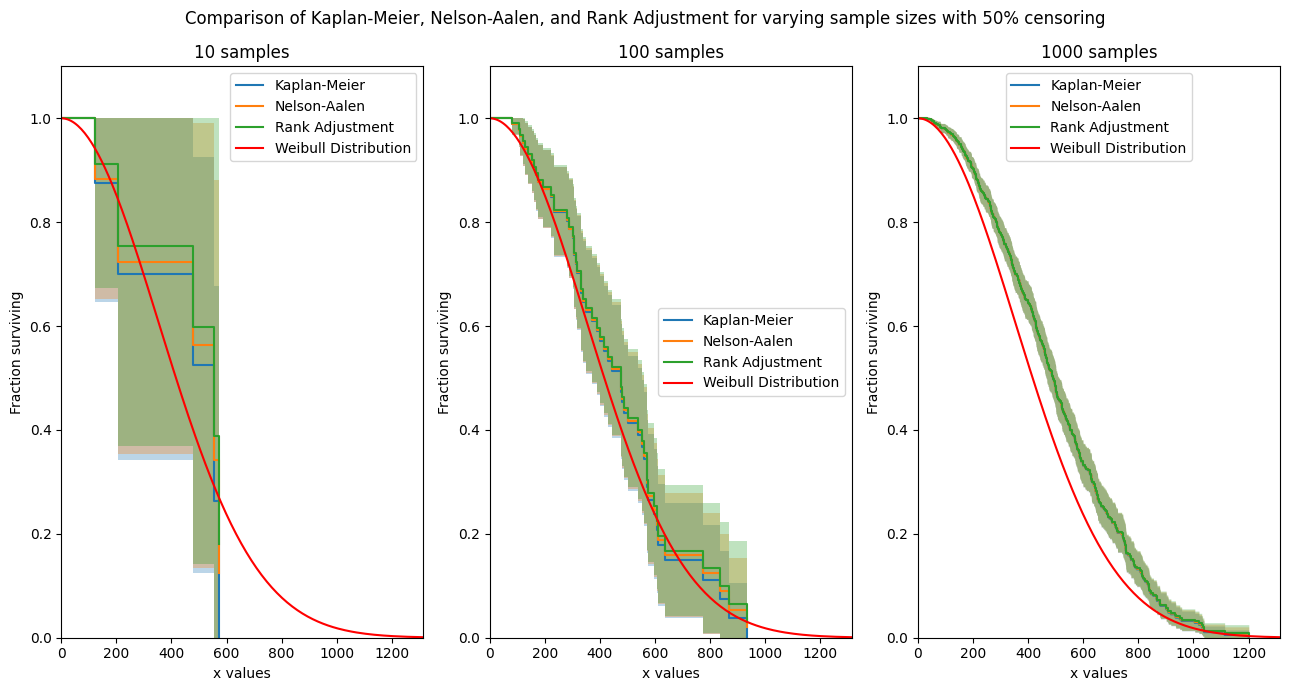

In [14]:
# Compare Kaplan–Meier, Nelson–Aalen, and Rank Adjustment estimators
# for increasing sample sizes with 50% censoring.

plt.figure(figsize=(13, 7))

for i, s in enumerate(samples):
    raw_data = dist.random_samples(number_of_samples=s, seed=42)
    data = make_right_censored_data(data=raw_data, fraction_censored=0.5, seed=42)  # this will multiply-censor 50% of the data
    plt.subplot(131 + i)
    KaplanMeier(failures=data.failures, right_censored=data.right_censored, print_results=False, show_plot=True, label='Kaplan-Meier')
    NelsonAalen(failures=data.failures, right_censored=data.right_censored, print_results=False, show_plot=True, label='Nelson-Aalen')
    RankAdjustment(failures=data.failures, right_censored=data.right_censored, print_results=False, show_plot=True, label='Rank Adjustment')
    dist.SF(label='Weibull Distribution', color='red')
    plt.title(str(str(s) + ' samples'))
    plt.legend()
plt.suptitle('Comparison of Kaplan-Meier, Nelson-Aalen, and Rank Adjustment for varying sample sizes with 50% censoring')
plt.tight_layout()
plt.show()



---

## 🧠 Interpretation of Results

| Estimator | **10 Samples** | **100 Samples** | **1000 Samples** |
|:--|:--|:--|:--|
| **Kaplan–Meier** | Produces the **lowest survival estimates** due to limited data and censoring effects. Variability is higher, and confidence intervals are wider. | Estimates become smoother and more stable, showing smaller differences compared to other methods. | Nearly identical to other estimators; convergence demonstrates asymptotic equivalence. |
| **Nelson–Aalen** | Provides **intermediate survival estimates**. The cumulative hazard formulation smooths results slightly compared to Kaplan–Meier. | Closely tracks Kaplan–Meier but remains marginally higher. | Almost indistinguishable from the other two estimators; consistent results achieved. |
| **Rank Adjustment** | Produces the **highest survival estimates**, compensating for small-sample bias through median-rank correction. | Slightly higher than Kaplan–Meier and Nelson–Aalen, but the difference narrows. | Practically identical to other estimators, confirming robustness as sample size increases. |


- For **small sample sizes (10 samples)**, the three estimators show noticeable differences due to limited data and the impact of censoring.  
  The **Rank Adjustment** method typically provides slightly higher survival estimates because of its median-rank correction.  

- As the **sample size increases (100 and 1000 samples)**, the differences between the **Kaplan–Meier**, **Nelson–Aalen**, and **Rank Adjustment** estimators diminish significantly.  
  This confirms that all three methods are **asymptotically equivalent**, producing nearly identical survival functions for large datasets.  

- The **Kaplan–Meier** estimator tends to yield the **lowest** survival probability, the **Nelson–Aalen** estimator lies in the **middle**, and the **Rank Adjustment** estimator gives the **highest** estimate.  
  This pattern aligns with theoretical expectations based on each method's computation.  

- The **Weibull distribution (red curve)** represents the true underlying survival behavior and provides a reference for how closely each estimator approximates the real model.  


### ✅ Summary

- As the **sample size increases**, the differences between the three estimators **diminish significantly**, demonstrating **asymptotic equivalence**.  
- The **Rank Adjustment** method performs best with **small or censored datasets**, offering less conservative estimates.  
- The **Kaplan–Meier** and **Nelson–Aalen** estimators are preferred for general applications due to their simplicity and interpretability.  
- The **Weibull distribution (red curve)** serves as the true reference model, showing how closely each estimator approximates the underlying survival behavior.


### ✅ Key Takeaways

- **Rank Adjustment** is particularly useful for **censored or small-sample datasets**.  
- **Kaplan–Meier** and **Nelson–Aalen** remain the most widely used due to their interpretability and simplicity.  
- For **large datasets**, all three estimators converge, providing consistent and robust reliability estimates.  
- This demonstrates that **non-parametric methods** are reliable tools for estimating survival behavior without assuming a specific probability distribution.

---
